In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch.nn as nn
import torch.optim as optim
from transformers import AutoFeatureExtractor, AutoModelForImageClassification, TrainingArguments, Trainer

In [3]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128 for CvT model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48, 0.47, 0.42], std=[0.226, 0.225, 0.227])  # ImageNet normalization
])


In [4]:
#Load Models
from transformers import AutoModelForImageClassification
import torch.nn as nn
import torch.optim as optim
import torch

# Define model again
model_name = "nvidia/mit-b0"
modelCrop = AutoModelForImageClassification.from_pretrained(
    model_name,
    num_labels=4,
    ignore_mismatched_sizes=True
)

# Redefine classifier layer
num_classes = 5
modelCrop.classifier = nn.Linear(modelCrop.classifier.in_features, num_classes)

# Move to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelCrop.to(device)

# Redefine optimizer
optimizer = optim.Adam(modelCrop.parameters(), lr=1e-4)

# Load checkpoint
checkpoint = torch.load('/content/drive/MyDrive/smartagriculture/cropModel.pth', map_location=device)

modelCrop.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

start_epoch = checkpoint['epoch']
last_loss = checkpoint['loss']

# Set model to eval or train mode as needed
modelCrop.eval()  # or model.train()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Some weights of SegformerForImageClassification were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 256]) in the checkpoint and torch.Size([4, 256]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/14.3M [00:00<?, ?B/s]

SegformerForImageClassification(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
   

In [5]:
test_dir = '/content/drive/MyDrive/CropsDetection/Dataset/test/'
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [6]:
total_images = len(test_dataset)
print(f"Total number of images in test dataset: {total_images}")

Total number of images in test dataset: 251


1
Actual label: jute
Predicted label: jute
True Prediction
2
Actual label: jute
Predicted label: jute
True Prediction
3
Actual label: jute
Predicted label: jute
True Prediction
4
Actual label: jute
Predicted label: jute
True Prediction
5
Actual label: jute
Predicted label: jute
True Prediction
6
Actual label: jute
Predicted label: jute
True Prediction
7
Actual label: jute
Predicted label: jute
True Prediction
8
Actual label: jute
Predicted label: jute
True Prediction
9
Actual label: jute
Predicted label: jute
True Prediction
10
Actual label: jute
Predicted label: jute
True Prediction
11
Actual label: jute
Predicted label: jute
True Prediction
12
Actual label: jute
Predicted label: jute
True Prediction
13
Actual label: jute
Predicted label: jute
True Prediction
14
Actual label: jute
Predicted label: jute
True Prediction
15
Actual label: jute
Predicted label: jute
True Prediction
16
Actual label: jute
Predicted label: jute
True Prediction
17
Actual label: jute
Predicted label: jute
True 

33
Actual label: jute
Predicted label: jute
True Prediction
34
Actual label: jute
Predicted label: jute
True Prediction
35
Actual label: jute
Predicted label: jute
True Prediction
36
Actual label: jute
Predicted label: jute
True Prediction
37
Actual label: jute
Predicted label: jute
True Prediction
38
Actual label: jute
Predicted label: jute
True Prediction
39
Actual label: jute
Predicted label: jute
True Prediction
40
Actual label: jute
Predicted label: jute
True Prediction
41
Actual label: jute
Predicted label: jute
True Prediction
42
Actual label: jute
Predicted label: jute
True Prediction
43
Actual label: jute
Predicted label: jute
True Prediction
44
Actual label: jute
Predicted label: jute
True Prediction
45
Actual label: jute
Predicted label: jute
True Prediction
46
Actual label: jute
Predicted label: jute
True Prediction
47
Actual label: jute
Predicted label: rice


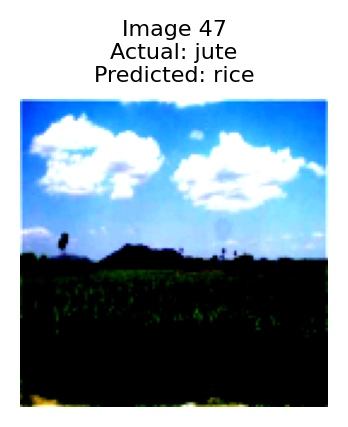

48
Actual label: jute
Predicted label: rice


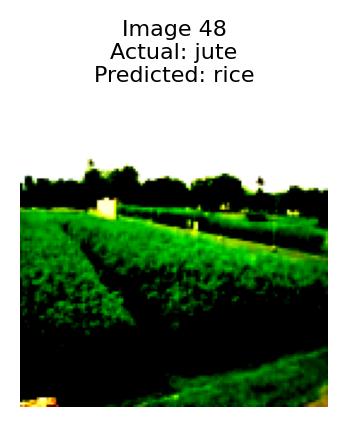

49
Actual label: jute
Predicted label: jute
True Prediction
50
Actual label: jute
Predicted label: jute
True Prediction
51
Actual label: maize
Predicted label: maize
True Prediction
52
Actual label: maize
Predicted label: maize
True Prediction
53
Actual label: maize
Predicted label: maize
True Prediction
54
Actual label: maize
Predicted label: maize
True Prediction
55
Actual label: maize
Predicted label: maize
True Prediction
56
Actual label: maize
Predicted label: maize
True Prediction
57
Actual label: maize
Predicted label: maize
True Prediction
58
Actual label: maize
Predicted label: maize
True Prediction
59
Actual label: maize
Predicted label: maize
True Prediction
60
Actual label: maize
Predicted label: maize
True Prediction
61
Actual label: maize
Predicted label: maize
True Prediction
62
Actual label: maize
Predicted label: maize
True Prediction
63
Actual label: maize
Predicted label: maize
True Prediction
64
Actual label: maize
Predicted label: maize
True Prediction


65
Actual label: maize
Predicted label: maize
True Prediction
66
Actual label: maize
Predicted label: maize
True Prediction
67
Actual label: maize
Predicted label: maize
True Prediction
68
Actual label: maize
Predicted label: maize
True Prediction
69
Actual label: maize
Predicted label: maize
True Prediction
70
Actual label: maize
Predicted label: maize
True Prediction
71
Actual label: maize
Predicted label: maize
True Prediction
72
Actual label: maize
Predicted label: maize
True Prediction
73
Actual label: maize
Predicted label: maize
True Prediction
74
Actual label: maize
Predicted label: maize
True Prediction
75
Actual label: maize
Predicted label: maize
True Prediction
76
Actual label: maize
Predicted label: maize
True Prediction
77
Actual label: maize
Predicted label: maize
True Prediction
78
Actual label: maize
Predicted label: maize
True Prediction
79
Actual label: maize
Predicted label: maize
True Prediction
80
Actual label: maize
Predicted label: maize
True Prediction
81
Actua

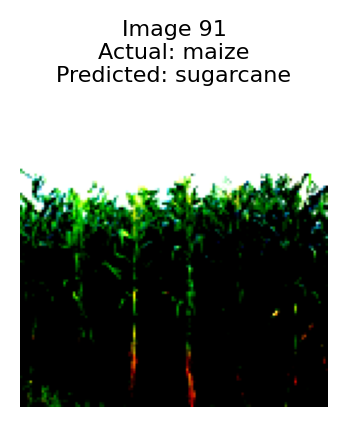

92
Actual label: maize
Predicted label: sugarcane


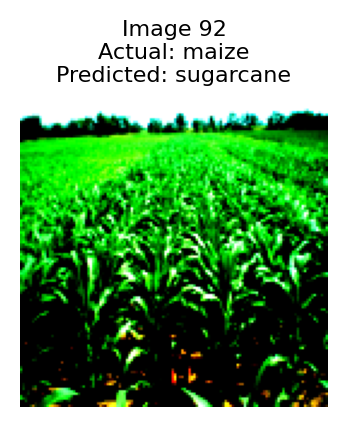

93
Actual label: maize
Predicted label: maize
True Prediction
94
Actual label: maize
Predicted label: maize
True Prediction
95
Actual label: maize
Predicted label: sugarcane


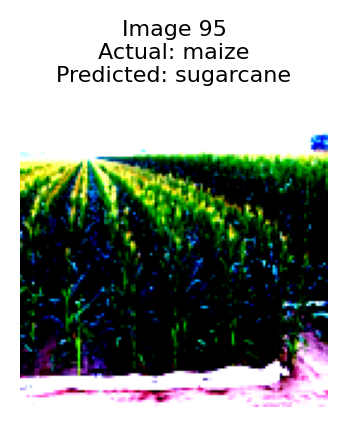

96
Actual label: maize
Predicted label: maize
True Prediction


97
Actual label: maize
Predicted label: maize
True Prediction
98
Actual label: maize
Predicted label: maize
True Prediction
99
Actual label: maize
Predicted label: rice


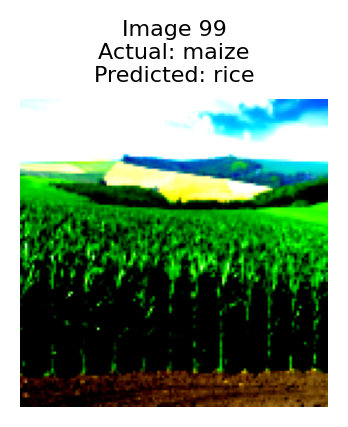

100
Actual label: maize
Predicted label: wheat


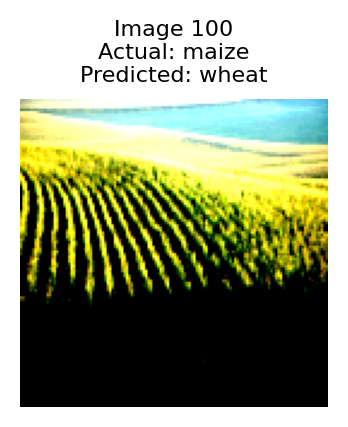

101
Actual label: rice
Predicted label: rice
True Prediction
102
Actual label: rice
Predicted label: rice
True Prediction
103
Actual label: rice
Predicted label: rice
True Prediction
104
Actual label: rice
Predicted label: rice
True Prediction
105
Actual label: rice
Predicted label: rice
True Prediction
106
Actual label: rice
Predicted label: rice
True Prediction
107
Actual label: rice
Predicted label: rice
True Prediction
108
Actual label: rice
Predicted label: rice
True Prediction
109
Actual label: rice
Predicted label: rice
True Prediction
110
Actual label: rice
Predicted label: rice
True Prediction
111
Actual label: rice
Predicted label: rice
True Prediction
112
Actual label: rice
Predicted label: rice
True Prediction
113
Actual label: rice
Predicted label: rice
True Prediction
114
Actual label: rice
Predicted label: rice
True Prediction
115
Actual label: rice
Predicted label: rice
True Prediction
116
Actual label: rice
Predicted label: rice
True Prediction
117
Actual label: rice
P

161
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
162
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
163
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
164
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
165
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
166
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
167
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
168
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
169
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
170
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
171
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
172
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
173
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
174
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
175
Ac

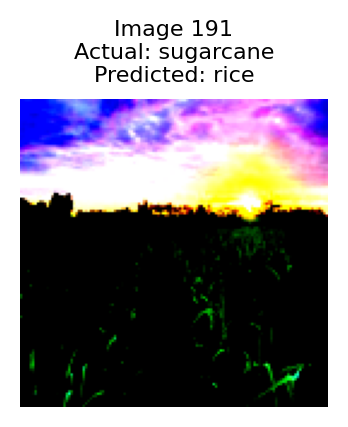

192
Actual label: sugarcane
Predicted label: rice


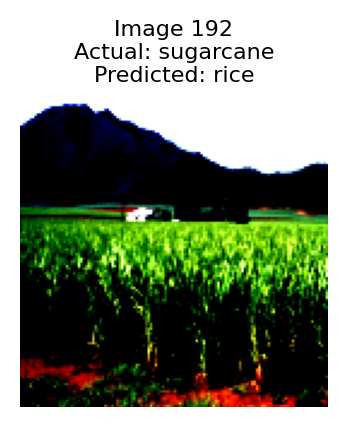

193
Actual label: sugarcane
Predicted label: rice


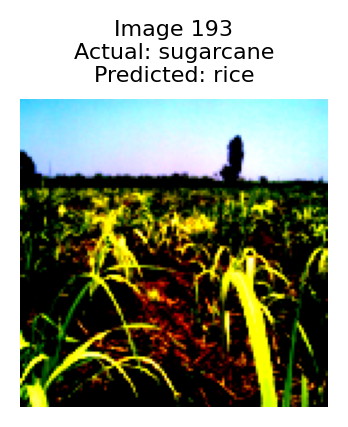

194
Actual label: sugarcane
Predicted label: rice


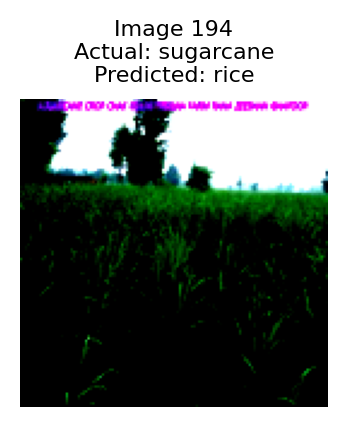

195
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
196
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
197
Actual label: sugarcane
Predicted label: rice


198
Actual label: sugarcane
Predicted label: rice


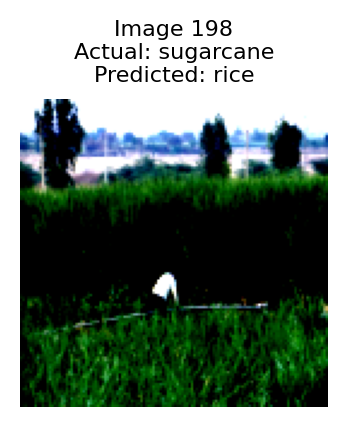

199
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
200
Actual label: sugarcane
Predicted label: sugarcane
True Prediction
201
Actual label: wheat
Predicted label: wheat
True Prediction
202
Actual label: wheat
Predicted label: wheat
True Prediction
203
Actual label: wheat
Predicted label: wheat
True Prediction
204
Actual label: wheat
Predicted label: wheat
True Prediction
205
Actual label: wheat
Predicted label: wheat
True Prediction
206
Actual label: wheat
Predicted label: wheat
True Prediction
207
Actual label: wheat
Predicted label: wheat
True Prediction
208
Actual label: wheat
Predicted label: wheat
True Prediction
209
Actual label: wheat
Predicted label: wheat
True Prediction
210
Actual label: wheat
Predicted label: wheat
True Prediction
211
Actual label: wheat
Predicted label: wheat
True Prediction
212
Actual label: wheat
Predicted label: wheat
True Prediction
213
Actual label: wheat
Predicted label: wheat
True Prediction
214
Actual label: wheat
Predicted label

225
Actual label: wheat
Predicted label: wheat
True Prediction
226
Actual label: wheat
Predicted label: wheat
True Prediction
227
Actual label: wheat
Predicted label: wheat
True Prediction
228
Actual label: wheat
Predicted label: wheat
True Prediction
229
Actual label: wheat
Predicted label: wheat
True Prediction
230
Actual label: wheat
Predicted label: wheat
True Prediction
231
Actual label: wheat
Predicted label: wheat
True Prediction
232
Actual label: wheat
Predicted label: wheat
True Prediction
233
Actual label: wheat
Predicted label: wheat
True Prediction
234
Actual label: wheat
Predicted label: wheat
True Prediction
235
Actual label: wheat
Predicted label: wheat
True Prediction
236
Actual label: wheat
Predicted label: wheat
True Prediction
237
Actual label: wheat
Predicted label: wheat
True Prediction
238
Actual label: wheat
Predicted label: wheat
True Prediction
239
Actual label: wheat
Predicted label: wheat
True Prediction
240
Actual label: wheat
Predicted label: wheat
True Pre

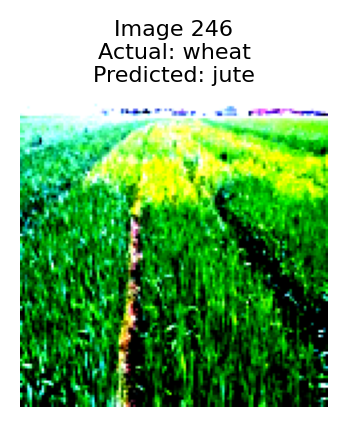

247
Actual label: wheat
Predicted label: wheat
True Prediction
248
Actual label: wheat
Predicted label: rice


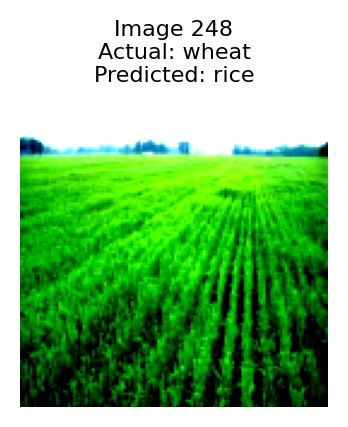

249
Actual label: wheat
Predicted label: wheat
True Prediction
250
Actual label: wheat
Predicted label: wheat
True Prediction
251
Actual label: wheat
Predicted label: wheat
True Prediction


In [9]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

class_names = test_dataset.classes
actual = []
predicted = []
imageName = []
conf = []


# Function to display an image along with its labels
def show_image(img, actual_label, predicted_label, idx):
    img = img.permute(1, 2, 0).cpu().numpy()  # Convert tensor to numpy array and permute dimensions

    # Create a figure with high resolution but small size
    plt.figure(figsize=(2, 2), dpi=200)  # Small figure size with high dpi for clarity
    plt.imshow(img)
    plt.xlabel('X-axis (Pixels)')
    plt.ylabel('Y-axis (Pixels)')
    plt.title(f"Image {idx}\nActual: {actual_label}\nPredicted: {predicted_label}", fontsize=8)
    plt.axis('off')
    plt.show()

j = 1
for images, labels in test_dataloader:
    images = images.to(device)
    with torch.no_grad():
        outputs_crop = modelCrop(images)

    predicted_labels = torch.argmax(outputs_crop.logits, dim=1)

    # Map predicted labels to class names
    predicted_class_names = [class_names[label] for label in predicted_labels]
    predicted_probs = F.softmax(outputs_crop.logits, dim=1)
    confidences = torch.max(predicted_probs, dim=1).values

    # Convert actual labels to class names
    actual_class_names = [class_names[label] for label in labels.tolist()]

    for i in range(len(images)):
        print(j)
        print("Actual label:", actual_class_names[i])
        actual.append(actual_class_names[i])
        print("Predicted label:", predicted_class_names[i])
        predicted.append(predicted_class_names[i])
        imageName.append(j)
        #print("Confidence:", confidences[i].item())
        #conf.append(confidences[i].item())

        # Display the image with labels and confidence
        if(predicted_class_names[i] != actual_class_names[i]):
            show_image(images[i], actual_class_names[i], predicted_class_names[i], j)
        else:
            print("True Prediction")


        j += 1


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, predicted)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

        jute       0.98      0.96      0.97        50
       maize       1.00      0.90      0.95        50
        rice       0.83      1.00      0.91        50
   sugarcane       0.94      0.88      0.91        50
       wheat       0.98      0.96      0.97        51

    accuracy                           0.94       251
   macro avg       0.95      0.94      0.94       251
weighted avg       0.95      0.94      0.94       251



In [14]:
print(predicted)

['jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'jute', 'rice', 'rice', 'jute', 'jute', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'sugarcane', 'sugarcane', 'maize', 'maize', 'sugarcane', 'maize', 'maize', 'maize', 'rice', 'wheat', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'r

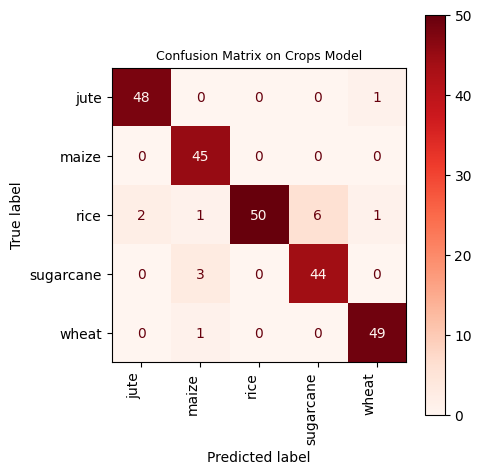

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert lists to numpy arrays
npredicted_classes = np.array(actual)
nactual_classes = np.array(predicted)

# Get unique class names from actual_classes
class_names = np.unique(actual)

# Compute confusion matrix
cm = confusion_matrix(nactual_classes, npredicted_classes, labels=class_names)

# Display confusion matrix with custom figure size
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the figure size here
disp.plot(cmap=plt.cm.Reds, values_format='d', ax=ax)

plt.title('Confusion Matrix on Crops Model', fontsize=9)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


Confusion Matrix:
 [[48  0  2  0  0]
 [ 0 45  1  3  1]
 [ 0  0 50  0  0]
 [ 0  0  6 44  0]
 [ 1  0  1  0 49]]


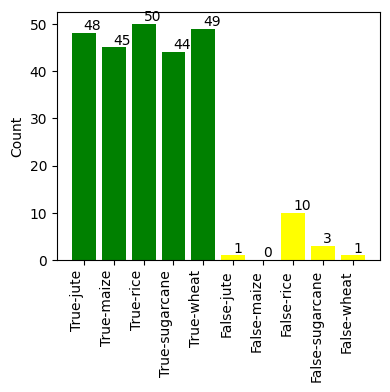

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assume test_true and test_preds are the true labels and predicted labels respectively
# Define class names based on the labels present in test_true and test_preds
class_names = np.unique(np.concatenate((actual, predicted)))

# Compute confusion matrix
cm = confusion_matrix(actual, predicted, labels=class_names)
print("Confusion Matrix:\n", cm)

# Extract counts from confusion matrix
true_positives = np.diag(cm)
false_positives = cm.sum(axis=0) - true_positives
false_negatives = cm.sum(axis=1) - true_positives

# Prepare data for bar graph
labels = [f'True-{cls}' for cls in class_names] + [f'False-{cls}' for cls in class_names]
counts = list(true_positives) + list(false_positives)

# Plot bar graph
plt.figure(figsize=(4, 4))
bars = plt.bar(labels, counts, color=['green']*len(class_names) + ['yellow']*len(class_names))
#plt.title('Counts of True and False Predictions Alzheimers-Impairments')
#plt.xlabel('Prediction Type')
plt.ylabel('Count')

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
#plt.savefig('prediction_counts.png')
plt.show()

In [23]:
import numpy as np

# Define the mapping
target_names=['jute',
 'maize',
 'rice',
 'sugarcane',
 'wheat'
 ]
label_mapping = {'jute':0,
 'maize':1,
 'rice':2,
 'sugarcane':3,
 'wheat':4
 }
nactual = np.array([label_mapping[label] for label in actual])
npredicted = np.array([label_mapping[label] for label in predicted])

In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Convert lists to numpy arrays
nnactual_classes = np.array(nactual)
nnpredicted_classes = np.array(npredicted)

# Compute Mean Absolute Error
mae = mean_absolute_error(nnactual_classes, nnpredicted_classes)

print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.1036


In [25]:
import numpy as np
from sklearn.metrics import matthews_corrcoef



# Compute Matthews Correlation Coefficient
mcc = matthews_corrcoef(actual, predicted)

print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Matthews Correlation Coefficient (MCC): 0.9266


In [26]:
#6. Cohen’s Kappa
#ECohen’s Kappa measures the agreement between observed and predicted classifications while accounting for chance.
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(actual, predicted)
print(f"Cohen’s Kappa: {kappa:.4f}")


Cohen’s Kappa: 0.9253


In [27]:
#9. Hamming Loss
#Hamming Loss measures the fraction of labels that are incorrectly predicted.
from sklearn.metrics import hamming_loss

hamming = hamming_loss(actual, predicted)
print(f"Hamming Loss: {hamming:.4f}")


Hamming Loss: 0.0598


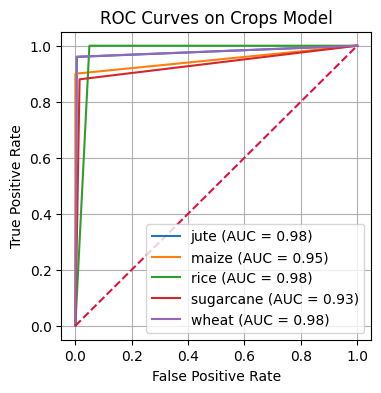

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Define class names
class_names = ['jute',
 'maize',
 'rice',
 'sugarcane',
 'wheat'
 ]

# Convert actual and predicted labels to binary format
actual_bin = label_binarize(actual, classes=class_names)
predicted_bin = label_binarize(predicted, classes=class_names)

# Initialize plot
plt.figure(figsize=(4, 4))

# Loop over each class to calculate ROC curve
for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(actual_bin[:, i], predicted_bin[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot each class's ROC curve
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line (random chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='crimson')

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves on Crops Model")
plt.legend(loc="lower right")
plt.grid()

# Show plot
plt.show()


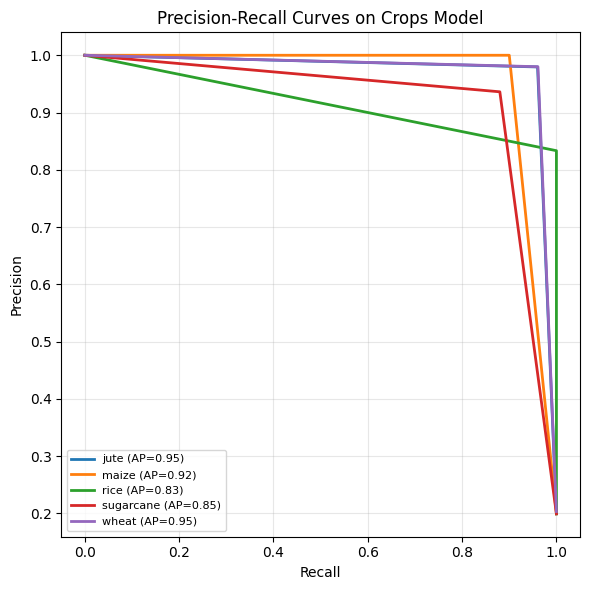

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Binarize actual labels
actual_bin = label_binarize(actual, classes=class_names)

# Use probabilities if you have them;
# if you only have predicted labels, you can binarize as below (less ideal)
predicted_bin = label_binarize(predicted, classes=class_names)

# Initialize plot
plt.figure(figsize=(6, 6))

# Loop over each class to calculate Precision-Recall
for i, class_name in enumerate(class_names):
    precision, recall, _ = precision_recall_curve(actual_bin[:, i], predicted_bin[:, i])

    # Compute average precision for this class
    ap = average_precision_score(actual_bin[:, i], predicted_bin[:, i])

    plt.plot(recall, precision, linewidth=2, label=f"{class_name} (AP={ap:.2f})")

# Labels, title, legend
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves on Crops Model")
plt.legend(fontsize=8, loc="lower left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [35]:

class_names = ['jute',
 'maize',
 'rice',
 'sugarcane',
 'wheat'
 ]

In [37]:
rpt = classification_report(actual, predicted, target_names=class_names, output_dict=True)


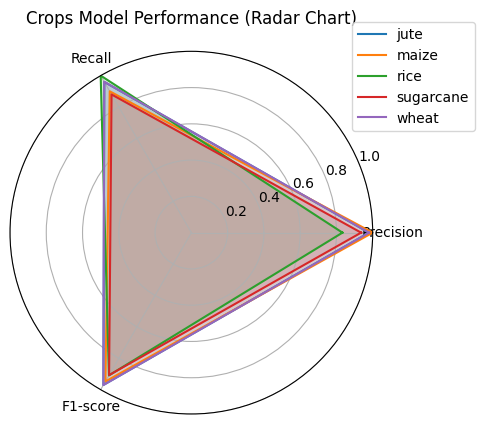

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Metrics
metrics = ['Precision', 'Recall', 'F1-score']
num_metrics = len(metrics)



# Build scores dictionary from classification report
scores = {
    cls: [
        rpt[cls]['precision'],
        rpt[cls]['recall'],
        rpt[cls]['f1-score']
    ]
    for cls in class_names
}

# Create radar chart
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

# Angles for each metric
angles = np.linspace(0, 2 * pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Close the radar

# Plot each pest class
for class_name, values in scores.items():
    values = values + values[:1]  # close loop
    ax.plot(angles, values, linewidth=1.5, label=class_name)
    ax.fill(angles, values, alpha=0.15)

# Axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_ylim(0, 1)

# Title & legend
plt.title("Crops Model Performance (Radar Chart)", pad=20)
plt.legend(bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


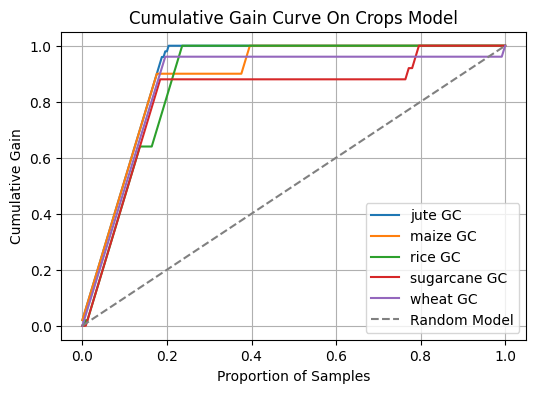

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Convert actual and predicted values into NumPy arrays
actuals = np.array(nactual)
predicteds = np.array( npredicted)

# Ensure the values are binary (0,1) for each class (One-vs-All)
#class_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
class_labels = ['jute',
 'maize',
 'rice',
 'sugarcane',
 'wheat'
 ]

plt.figure(figsize=(6, 4))

for i, label in enumerate(class_labels):
    # Convert to binary classification for each class
    y_true = (actuals == i).astype(int)
    y_pred = (predicteds == i).astype(int)

    # Sort by predicted probability
    sorted_indices = np.argsort(-y_pred)
    cumulative_gain = np.cumsum(y_true[sorted_indices]) / np.sum(y_true)

    # Plot Cumulative Gain Curve
    plt.plot(np.linspace(0, 1, len(cumulative_gain)), cumulative_gain, label=f"{label} GC")

# Reference diagonal for random model
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Model")

# Labels and formatting
plt.xlabel("Proportion of Samples")
plt.ylabel("Cumulative Gain")
plt.title("Cumulative Gain Curve On Crops Model")
plt.legend()
plt.grid()
plt.show()


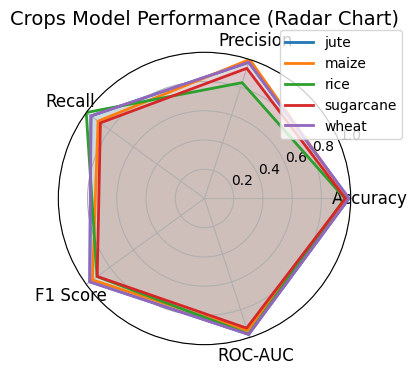

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Class names
class_names = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']
n_classes = len(class_names)

# Convert to numpy arrays
actual = np.array(actual)
predicted = np.array(predicted)

# Binarize labels for multiclass ROC AUC
actual_bin = label_binarize(actual, classes=class_names)
predicted_bin = label_binarize(predicted, classes=class_names)

# Prepare performance metrics per class
metrics_per_class = {
    'Accuracy': [],
    'Precision': precision_score(actual, predicted, average=None, labels=class_names, zero_division=0),
    'Recall': recall_score(actual, predicted, average=None, labels=class_names, zero_division=0),
    'F1 Score': f1_score(actual, predicted, average=None, labels=class_names, zero_division=0),
    'ROC-AUC': []
}

# Compute Accuracy and ROC-AUC per class
for i, cls in enumerate(class_names):
    cls_mask = (actual == cls)
    pred_mask = (predicted == cls)

    acc = accuracy_score(cls_mask, pred_mask)
    metrics_per_class['Accuracy'].append(acc)

    try:
        auc_score = roc_auc_score(actual_bin[:, i], predicted_bin[:, i])
    except ValueError:
        auc_score = 0.0
    metrics_per_class['ROC-AUC'].append(auc_score)

# Radar chart labels and angles
labels = list(metrics_per_class.keys())
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close loop

# Create figure
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

# Plot each class in the same radar chart
for idx, cls in enumerate(class_names):
    stats = [metrics_per_class[metric][idx] for metric in labels]
    stats += stats[:1]  # close loop
    ax.plot(angles, stats, linewidth=2, label=cls)
    ax.fill(angles, stats, alpha=0.1)

# Format chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_ylim(0, 1)
ax.set_title("Crops Model Performance (Radar Chart)", fontsize=14, pad=20)
ax.tick_params(axis='y', labelsize=10)

# Legend outside
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)
plt.tight_layout()
plt.show()


In [40]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=eb6e4ab1d7131c34d1ae862df9c7e60bb096bd07a3da4cd01ee32ad06ecb5235
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [44]:
test_dirs = {
    cls: f"/content/drive/MyDrive/CropsDetection/Dataset/test/{cls}"
    for cls in class_names
}


In [45]:
import os
imageNam = []
test_images = []

for label, path in test_dirs.items():
    if not os.path.exists(path):
        print(f"Warning: {path} does not exist")
        continue

    images = sorted(os.listdir(path))[:4]  # pick first 4 images

    for img_name in images:
        test_images.append((label, os.path.join(path, img_name)))
        imageNam.append(img_name)


In [46]:
test_images

[('jute',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/jute/Jute049a.jpg'),
 ('jute',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/jute/jute001a.jpeg'),
 ('jute',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/jute/jute002a.jpeg'),
 ('jute',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/jute/jute003a.jpeg'),
 ('maize',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/maize/maize001a.jpeg'),
 ('maize',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/maize/maize002a.jpeg'),
 ('maize',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/maize/maize003a.jpeg'),
 ('maize',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/maize/maize004a.jpeg'),
 ('rice',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/rice/rice001a.jpeg'),
 ('rice',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/rice/rice002a.jpeg'),
 ('rice',
  '/content/drive/MyDrive/CropsDetection/Dataset/test/rice/rice003a.jpeg'),
 ('rice',
  '/content/drive/MyDrive/CropsDe

In [47]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

In [56]:
# ✅ LIME prediction function
def lime_predict(images):
    batch = torch.stack([transform(Image.fromarray(img)).to(device) for img in images])
    with torch.no_grad():
        preds = modelCrop(batch).logits
        return torch.softmax(preds, dim=1).cpu().numpy()

In [50]:
explainer = lime_image.LimeImageExplainer()

  0%|          | 0/1000 [00:00<?, ?it/s]

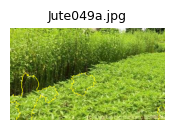

  0%|          | 0/1000 [00:00<?, ?it/s]

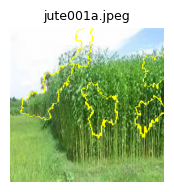

  0%|          | 0/1000 [00:00<?, ?it/s]

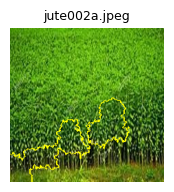

  0%|          | 0/1000 [00:00<?, ?it/s]

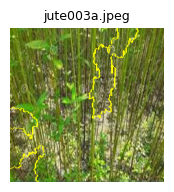

  0%|          | 0/1000 [00:00<?, ?it/s]

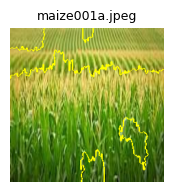

  0%|          | 0/1000 [00:00<?, ?it/s]

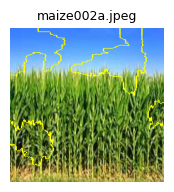

  0%|          | 0/1000 [00:00<?, ?it/s]

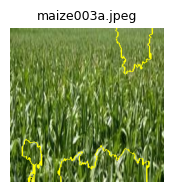

  0%|          | 0/1000 [00:00<?, ?it/s]

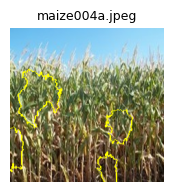

  0%|          | 0/1000 [00:00<?, ?it/s]

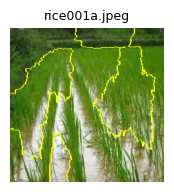

  0%|          | 0/1000 [00:00<?, ?it/s]

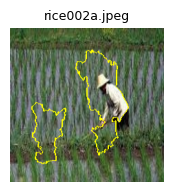

  0%|          | 0/1000 [00:00<?, ?it/s]

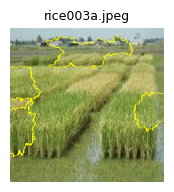

  0%|          | 0/1000 [00:00<?, ?it/s]

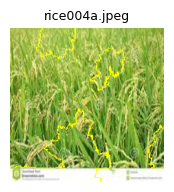

  0%|          | 0/1000 [00:00<?, ?it/s]

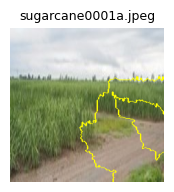

  0%|          | 0/1000 [00:00<?, ?it/s]

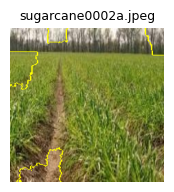

  0%|          | 0/1000 [00:00<?, ?it/s]

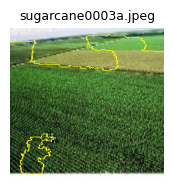

  0%|          | 0/1000 [00:00<?, ?it/s]

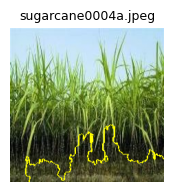

  0%|          | 0/1000 [00:00<?, ?it/s]

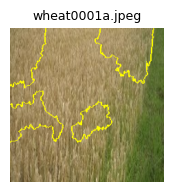

  0%|          | 0/1000 [00:00<?, ?it/s]

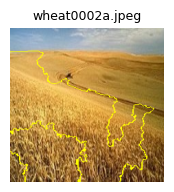

  0%|          | 0/1000 [00:00<?, ?it/s]

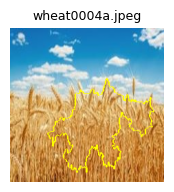

  0%|          | 0/1000 [00:00<?, ?it/s]

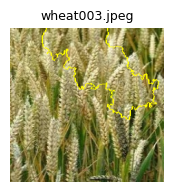

In [57]:
# ✅ Initialize LIME Explainer


# ✅ Process each image
i=0
for idx, (label, image_path) in enumerate(test_images):
    # Load and preprocess image
    image = Image.open(image_path).convert("RGB")

    # Generate LIME explanation
    explanation = explainer.explain_instance(
        np.array(image),
        lime_predict,
        top_labels=1,
        hide_color=0,
        num_samples=1000
    )

    # Get the predicted class
    input_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = modelCrop(input_tensor).logits
        predicted_class = torch.argmax(torch.softmax(output, dim=1)).item()

    # ✅ Visualize Explanation
    temp, mask = explanation.get_image_and_mask(predicted_class, positive_only=True, num_features=5, hide_rest=False)

    plt.figure(figsize=(2, 2))
    plt.imshow(mark_boundaries(temp, mask))
    plt.title(f"{imageNam[i]}", fontsize=9)
    #plt.title(f"LIME Explanation")

    plt.axis("off")
    plt.show()
    i=i+1

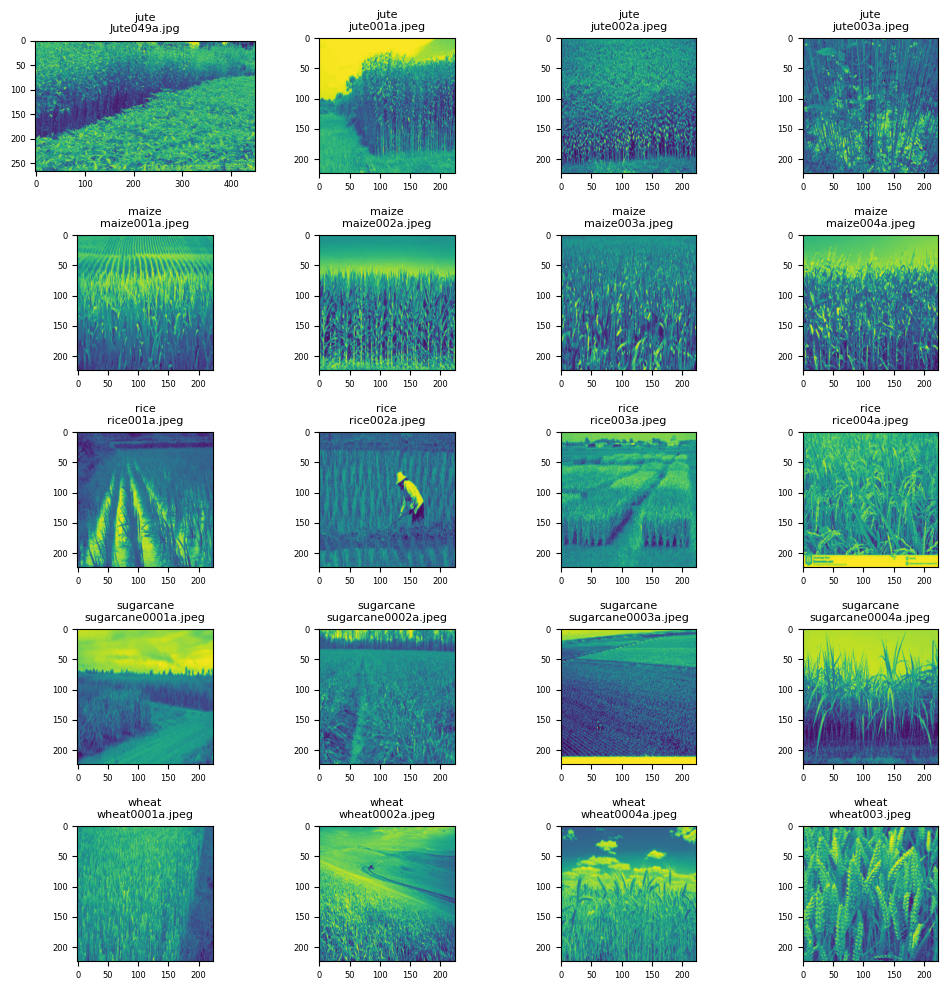

In [58]:
#Train Images
import os
import matplotlib.pyplot as plt
from PIL import Image





# ✅ Plot Images in Grid (3 Rows: Mild, Moderate, No; 4 Columns)
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))  # 3 rows, 4 columns

for i, (label, img_path) in enumerate(test_images):
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    image = Image.open(img_path).convert("L")  # Convert to grayscale (L mode)

    # ✅ Display Image with Grayscale Fix
    axes[row, col].imshow(image)  # Force black & white
    axes[row, col].set_title(f"{label}\n{imageNam[i]}", fontsize=8)  # Display class & filename
    #axes[row, col].set_xlabel("Width (px)", fontsize=6)  # X-axis label
    #axes[row, col].set_ylabel("Height (px)", fontsize=6) # Y-axis label
    axes[row, col].tick_params(axis='both', which='both', labelsize=6)  # Reduce tick font size

plt.tight_layout()
plt.show()
